# 起動・ライブラリの準備

## ライブラリのインポート

In [83]:
# 配列計算ライブラリ NumPy
import numpy as np

# 画像表示用関数
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# tf.Kerasのディープラーニング用クラス
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import utils

# tf.Kerasに入っているMnistデータ
from tensorflow.keras.datasets import mnist

# データの準備・加工

## データセットの読み込み

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 学習用画像を1枚表示

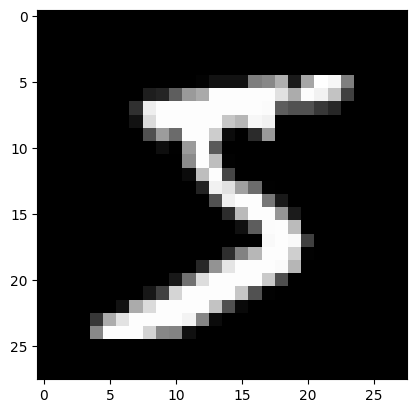

In [62]:
imshow(X_train[0], "gray")

## 学習用正解ラベルを1つ表示

In [63]:
print(y_train[0])

5


## 変数の構造を確認

In [64]:
print(X_train.shape)

(60000, 28, 28)


## 画像の実際の内容を確認

In [65]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 前処理１：画像を一次元の配列に変形

In [66]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## 前処理２：画素の正規化

In [67]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## 前処理３：正解ラベルのOne-Hotエンコーディング

In [68]:
#★現在のラベルを表示
print(y_train)

[5 0 4 ... 5 6 8]


In [69]:
#★One-Hotエンコーディング
y_train_label = utils.to_categorical(y_train)
y_test_label = utils.to_categorical(y_test)

In [70]:
#★結果を表示
print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# 学習方法の決定

## ニューラルネットワークモデルを構築

In [84]:
def build_multilayer_perceptron():
    model = Sequential()

    model.add(Dense(512, input_shape=(784,1)))
    model.add(Activation('relu'))
    
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(Activation('relu'))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [85]:
#★上の関数でモデルを構築
model = build_multilayer_perceptron()

## モデルの構造を確認

In [73]:
#★
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

## モデルのコンパイル

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# 学習

## 学習の実行

In [75]:
history = model.fit(x_train, y_train_label,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_test, y_test_label))

Epoch 1/10
469/469 [==============================] - 9s 16ms/step - loss: 0.2262 - accuracy: 0.9317 - val_loss: 0.1082 - val_accuracy: 0.9639
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0821 - accuracy: 0.9742 - val_loss: 0.0873 - val_accuracy: 0.9719
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0723 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0682 - val_accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0994 - val_accuracy: 0.9731
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0776 - val_accuracy: 0.9779

# 予測・評価

## 精度の評価

In [76]:
#★
score = model.evaluate(x_test, y_test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9795


In [77]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07703336328268051
Test accuracy: 0.9794999957084656


## 実際の予測

In [78]:
#★
predicts = model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 1s 4ms/step


predit label is 7
label is 7


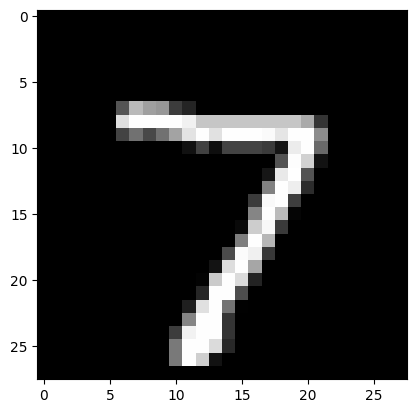

In [79]:
#★ X_test, y_test, predictsの最初の要素[0]を表示
print(f"predit label is {predicts[0]}")
print(f"label is {y_test[0]}")
imshow(X_test[0], "gray")

## 不正解を取得

In [80]:
wrongs = []
for i, (y,predict) in enumerate(zip(y_test,predicts)):
    if y != predict:
        wrongs.append((i,(y, predict)))
wrongs 

[(104, (9, 5)),
 (111, (7, 1)),
 (115, (4, 9)),
 (119, (2, 8)),
 (151, (9, 8)),
 (217, (6, 5)),
 (247, (4, 2)),
 (259, (6, 0)),
 (321, (2, 7)),
 (445, (6, 0)),
 (552, (0, 8)),
 (582, (8, 2)),
 (583, (2, 7)),
 (646, (2, 6)),
 (659, (2, 1)),
 (684, (7, 3)),
 (691, (8, 4)),
 (707, (4, 9)),
 (720, (5, 8)),
 (900, (1, 5)),
 (924, (2, 7)),
 (947, (8, 9)),
 (1014, (6, 5)),
 (1039, (7, 2)),
 (1112, (4, 6)),
 (1156, (7, 8)),
 (1166, (3, 5)),
 (1226, (7, 2)),
 (1232, (9, 4)),
 (1239, (3, 5)),
 (1242, (4, 9)),
 (1247, (9, 5)),
 (1260, (7, 1)),
 (1299, (5, 7)),
 (1319, (8, 3)),
 (1328, (7, 8)),
 (1393, (5, 3)),
 (1395, (2, 3)),
 (1414, (9, 5)),
 (1444, (6, 4)),
 (1494, (7, 0)),
 (1500, (7, 1)),
 (1522, (7, 9)),
 (1527, (1, 5)),
 (1530, (8, 7)),
 (1531, (3, 5)),
 (1549, (4, 6)),
 (1609, (2, 6)),
 (1642, (2, 6)),
 (1681, (3, 7)),
 (1716, (7, 1)),
 (1717, (8, 0)),
 (1732, (9, 5)),
 (1773, (1, 6)),
 (1790, (2, 8)),
 (1901, (9, 4)),
 (1911, (5, 6)),
 (1941, (7, 8)),
 (1982, (6, 5)),
 (2004, (8, 5)),
 (

## 不正解画像を表示

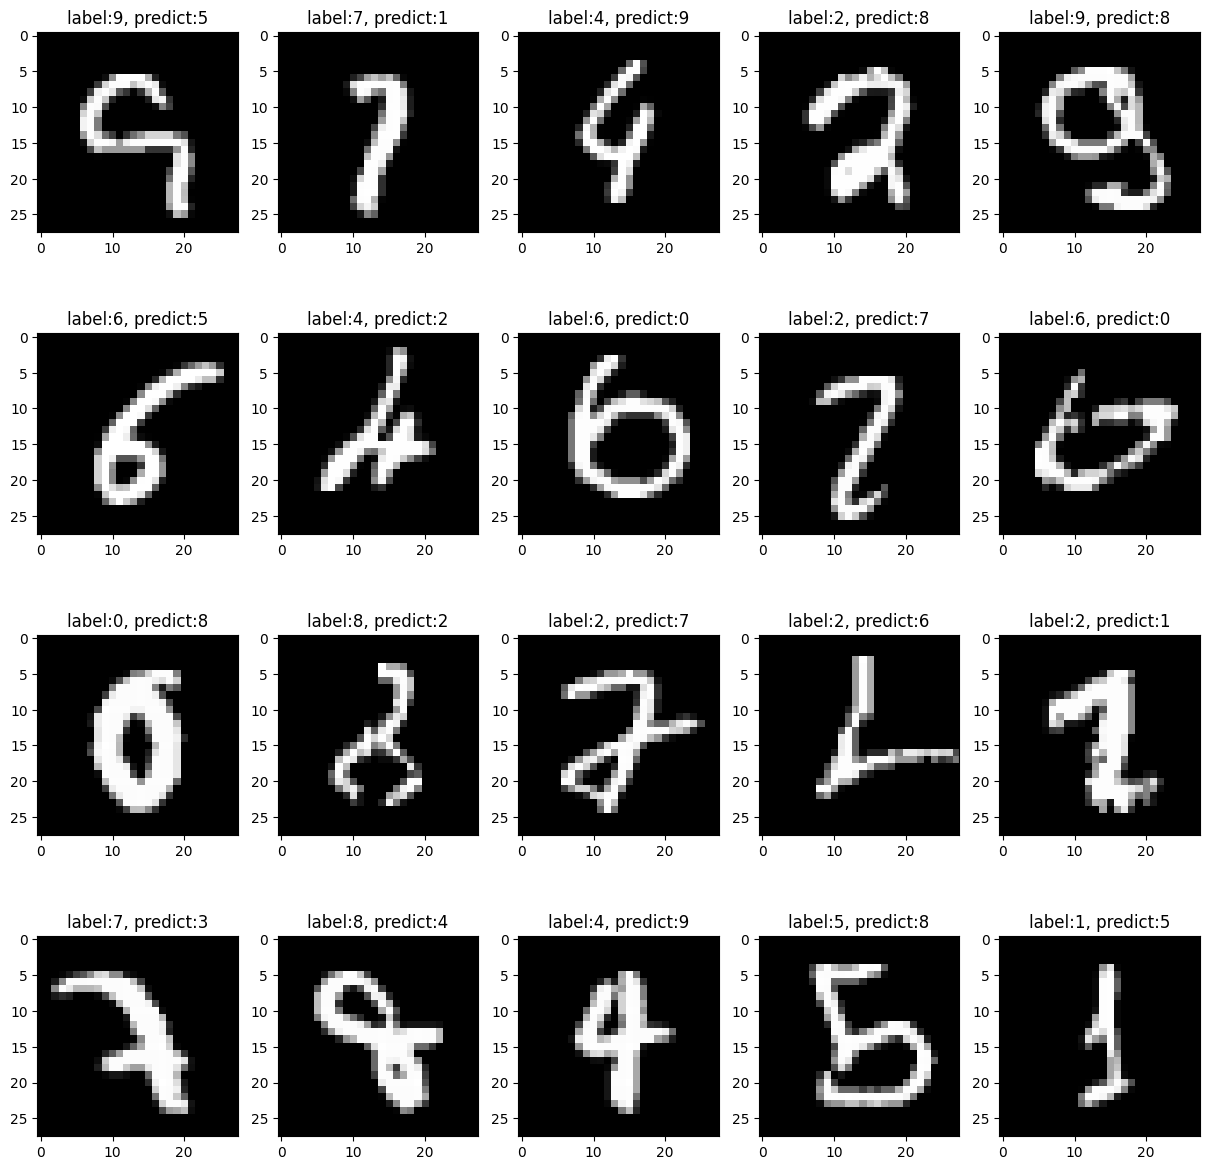

In [81]:
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title(f"label:{label}, predict:{predict}")
    axes.imshow(X_test[index], "gray")

## モデルの保存

In [82]:
model.save("model.keras")